# Chapter 1: Xarra data structures and selection

In [1]:
import xarray as xr
import numpy as np

In [2]:
# When working in a Jupyter Notebook you might want to customize Xarray display settings to your liking
# The following settings reduce the amount of data displayed out by default
xr.set_options(display_expand_attrs=False, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

## Explain xarray data structures: xarray.DataArray and xarray.Dataset

Xarray can be used to manipulate data in the form of multi-dimensional (a.k.a. N-dimensional, ND) arrays.  In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc.

<div style="background-color: rgb(200, 200, 200);">
    <img alt="Dataset structure" src="images/dataset-diagram.png" />
</div>

### xarray.Dataset

In [3]:
ds = xr.tutorial.load_dataset("air_temperature_gradient")

In [4]:
type(ds)

xarray.core.dataset.Dataset

See how `xarray.Dataset` is structured

In [5]:
ds

<xarray.Dataset> Size: 62MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
    dTdx     (time, lat, lon) float32 15MB 1.826e-05 1.616e-05 ... -1.882e-06
    dTdy     (time, lat, lon) float32 15MB -9.905e-06 -7.619e-06 ... -1.905e-06
Attributes: (5)

A `xarray.DataArray` is composed of several data variables. Each data variables is a `xarray.DataArray`

### xarray.DataArray

In [6]:
da = ds["Tair"]

In [7]:
type(da)

xarray.core.dataarray.DataArray

See how a `xarray.DataArray` is structured

In [8]:
da

<xarray.DataArray 'Tair' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

## Select variables

The selection of data variables in a `xarray.Dataset` is similar to select columns in `pandas.DataFrame`.

#### Select `Tair` variable

In [9]:
ds["Tair"]

<xarray.DataArray 'Tair' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

In [10]:
ds.Tair

<xarray.DataArray 'Tair' (time: 2920, lat: 25, lon: 53)> Size: 31MB
241.2 242.5 243.5 244.0 244.1 243.9 ... 297.9 297.4 297.2 296.5 296.2 295.7
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes: (11)

#### Select `Tair` variable (but still get a xarray.Dataset)

In [11]:
ds[["Tair"]]

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes: (5)

#### Select `dTdx` and `dTdy` variables

In [12]:
ds[["dTdx","dTdy"]]

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    dTdx     (time, lat, lon) float32 15MB 1.826e-05 1.616e-05 ... -1.882e-06
    dTdy     (time, lat, lon) float32 15MB -9.905e-06 -7.619e-06 ... -1.905e-06
Attributes: (5)

## Selecting / Indexing

The selection is done by using `sel` method.

In [13]:
xr.Dataset.sel?

Signature:
xr.Dataset.sel(
    self,
    indexers: 'Mapping[Any, Any] | None' = None,
    method: 'str | None' = None,
    tolerance: 'int | float | Iterable[int | float] | None' = None,
    drop: 'bool' = False,
    **indexers_kwargs: 'Any',
) -> 'Self'
Docstring:
Returns a new dataset with each array indexed by tick labels
along the specified dimension(s).

In contrast to `Dataset.isel`, indexers for this method should use
labels instead of integers.

Under the hood, this method is powered by using pandas's powerful Index
objects. This makes label based indexing essentially just as fast as
using integer indexing.

It also means this method uses pandas's (well documented) logic for
indexing. This means you can use string shortcuts for datetime indexes
(e.g., '2000-01' to select all values in January 2000). It also means
that slices are treated as inclusive of both the start and stop values,
unlike normal Python indexing.

Parameters
----------
indexers : dict, optional
    A dict with

### Select time

Select a specific datetime

In [14]:
ds.sel(time='2013-06-10T12:00:00')

<xarray.Dataset> Size: 22kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-06-10T12:00:00
Data variables:
    Tair     (lat, lon) float64 11kB 272.9 272.7 272.4 ... 297.2 297.0 297.2
    dTdx     (lat, lon) float32 5kB -2.81e-06 -3.512e-06 ... 0.0 7.529e-07
    dTdy     (lat, lon) float32 5kB 3.048e-06 2.667e-06 ... -2.667e-06
Attributes: (5)

Select a specific day

In [15]:
ds.sel(time="2013-06-10")

<xarray.Dataset> Size: 85kB
Dimensions:  (lat: 25, time: 4, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 32B 2013-06-10 ... 2013-06-10T18:00:00
Data variables:
    Tair     (time, lat, lon) float64 42kB 275.3 275.2 275.0 ... 297.5 297.4
    dTdx     (time, lat, lon) float32 21kB -1.265e-06 -2.037e-06 ... -3.765e-07
    dTdy     (time, lat, lon) float32 21kB -2.705e-06 -3.429e-06 ... -1.143e-06
Attributes: (5)

Select a specific point (lat=70, lon=210)

In [16]:
ds.sel(lat=70,lon=210)

<xarray.Dataset> Size: 70kB
Dimensions:  (time: 2920)
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 210.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time) float64 23kB 246.0 249.3 250.2 247.0 ... 259.8 259.4 257.8
    dTdx     (time) float32 12kB -1.653e-05 -1.754e-05 ... -1.542e-05 -2.658e-05
    dTdy     (time) float32 12kB -4.288e-05 -4.248e-05 ... -4.933e-05 -4.876e-05
Attributes: (5)

Select into a box (use `slice`)

In [17]:
ds.sel(lat=slice(30, 20), lon=slice(230,240))

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 5, time: 2920, lon: 5)
Coordinates:
  * lat      (lat) float32 20B 30.0 27.5 25.0 22.5 20.0
  * lon      (lon) float32 20B 230.0 232.5 235.0 237.5 240.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float64 584kB 288.9 288.4 287.4 ... 294.8 294.8
    dTdx     (time, lat, lon) float32 292kB -2.729e-06 -3.149e-06 ... 7.739e-07
    dTdy     (time, lat, lon) float32 292kB -1.905e-06 -4e-06 ... -7.619e-06
Attributes: (5)

The point (lat=18.3,lon=233.3) does not belong to the dataset but you can use `method="nearest"` to look up to the neighbors.

In [18]:
ds.sel(lat=18.3,lon=233.3, method="nearest")

<xarray.Dataset> Size: 70kB
Dimensions:  (time: 2920)
Coordinates:
    lat      float32 4B 17.5
    lon      float32 4B 232.5
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time) float64 23kB 293.4 293.6 293.2 293.3 ... 295.9 296.4 296.5
    dTdx     (time) float32 12kB 2.497e-06 2.269e-06 ... 1.716e-06 3.813e-07
    dTdy     (time) float32 12kB -6.476e-06 -6.305e-06 ... -3.429e-06 -3.429e-06
Attributes: (5)

## Plot

You can use `plot` method to plot data

Select a sepecific day and plot the air temperature.

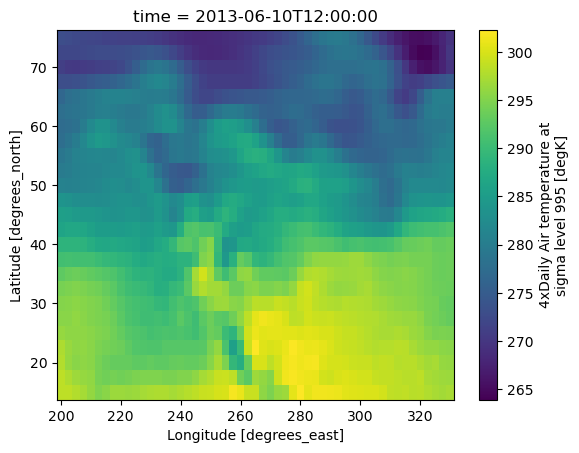

In [19]:
newds = ds.sel(time='2013-06-10T12:00:00')
newds.Tair.plot()

Select a sepecific point and plot the air temperature.

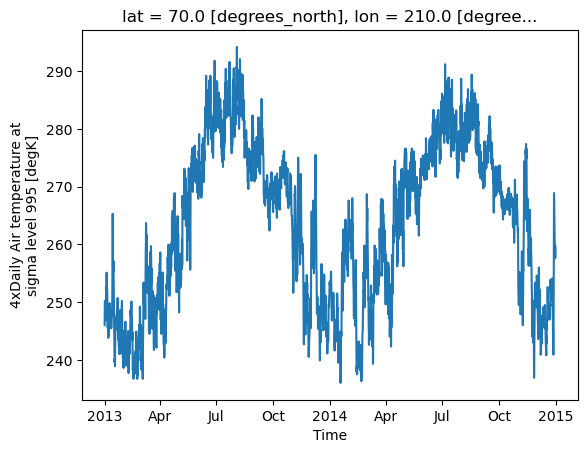

In [20]:
newds = ds.sel(lat=70,lon=210)
newds.Tair.plot()